In [ ]:
#Problem :1
#(Sampling, 10pts) Before we do any experiment in this homework, make sure that you use gray 
#scale normalized image for your experiment, i.e., your image intensity should range [0; 1]. You 
#may use built-in functions for image normalization. Implement your own function to downsample 
#an image into half size (for x and y directions) by sampling every other pixel. Perform 
#downsampling twice on ‘lena.png’. Compare the downsampled images with the original in the 
#same actual size (pixel size for low resolution images should be bigger.) How do they look? Now, 
#perform upsampling of the image by inserting an empty pixel between every and each pixel. Run 
#it twice to get it back to the original size. How are the upsampled images looking? Write your 
#observation in the report

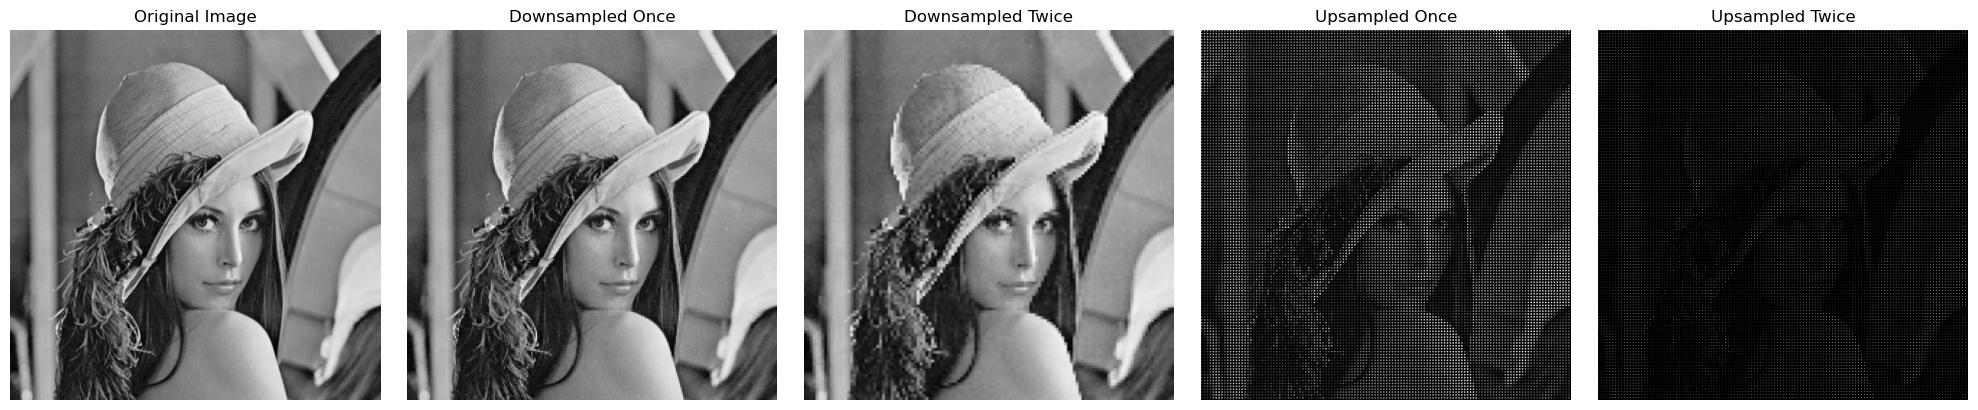

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and normalize it to [0, 1]
def load_image(path):
    image = Image.open(path).convert('L')  # Convert to grayscale
    return np.array(image) / 255.0  # Normalize to [0, 1]

# Downsample image by taking every other pixel
def downsample_image(image):
    return image[::2, ::2]

# Upsample the image by inserting zeros between pixels
def upsample_image(image):
    height, width = image.shape
    upsampled_image = np.zeros((height * 2, width * 2))  # Create a zero-filled array
    upsampled_image[::2, ::2] = image  # Insert original pixel values in every other position
    return upsampled_image

# Load the original image
image = load_image('lena.png')

# First downsampling
downsampled_once = downsample_image(image)

# Second downsampling
downsampled_twice = downsample_image(downsampled_once)

# First upsampling
upsampled_once = upsample_image(downsampled_twice)

# Second upsampling
upsampled_twice = upsample_image(upsampled_once)

# Display the images for comparison
def display_images(original, downsampled_once, downsampled_twice, upsampled_once, upsampled_twice):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original Image')
    
    axes[1].imshow(downsampled_once, cmap='gray')
    axes[1].set_title('Downsampled Once')
    
    axes[2].imshow(downsampled_twice, cmap='gray')
    axes[2].set_title('Downsampled Twice')
    
    axes[3].imshow(upsampled_once, cmap='gray')
    axes[3].set_title('Upsampled Once')
    
    axes[4].imshow(upsampled_twice, cmap='gray')
    axes[4].set_title('Upsampled Twice')

    for ax in axes:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display all images
display_images(image, downsampled_once, downsampled_twice, upsampled_once, upsampled_twice)


In [ ]:
#Problem :2 
#(Gaussian smoothing, 30pts) Implement a function that takes in an image I, kernel size k and 
#scaling parameter s (i.e., σ) and outputs its smoothed version after Gaussian smoothing, i.e., 
#I_smooth = myGaussianSmoothing(I, k, s). Test it on the given image ‘lena.png’. Change the 
#kernel size to k ={3; 5; 7; 11; 51} with fixed s = 1. What changes in the result do you see? Now, 
#change the s = {0:1; 1; 2; 3; 5} with fixed kernel size k = 11. How is the result changing? Explain 
#what you did and a brief report on your observation

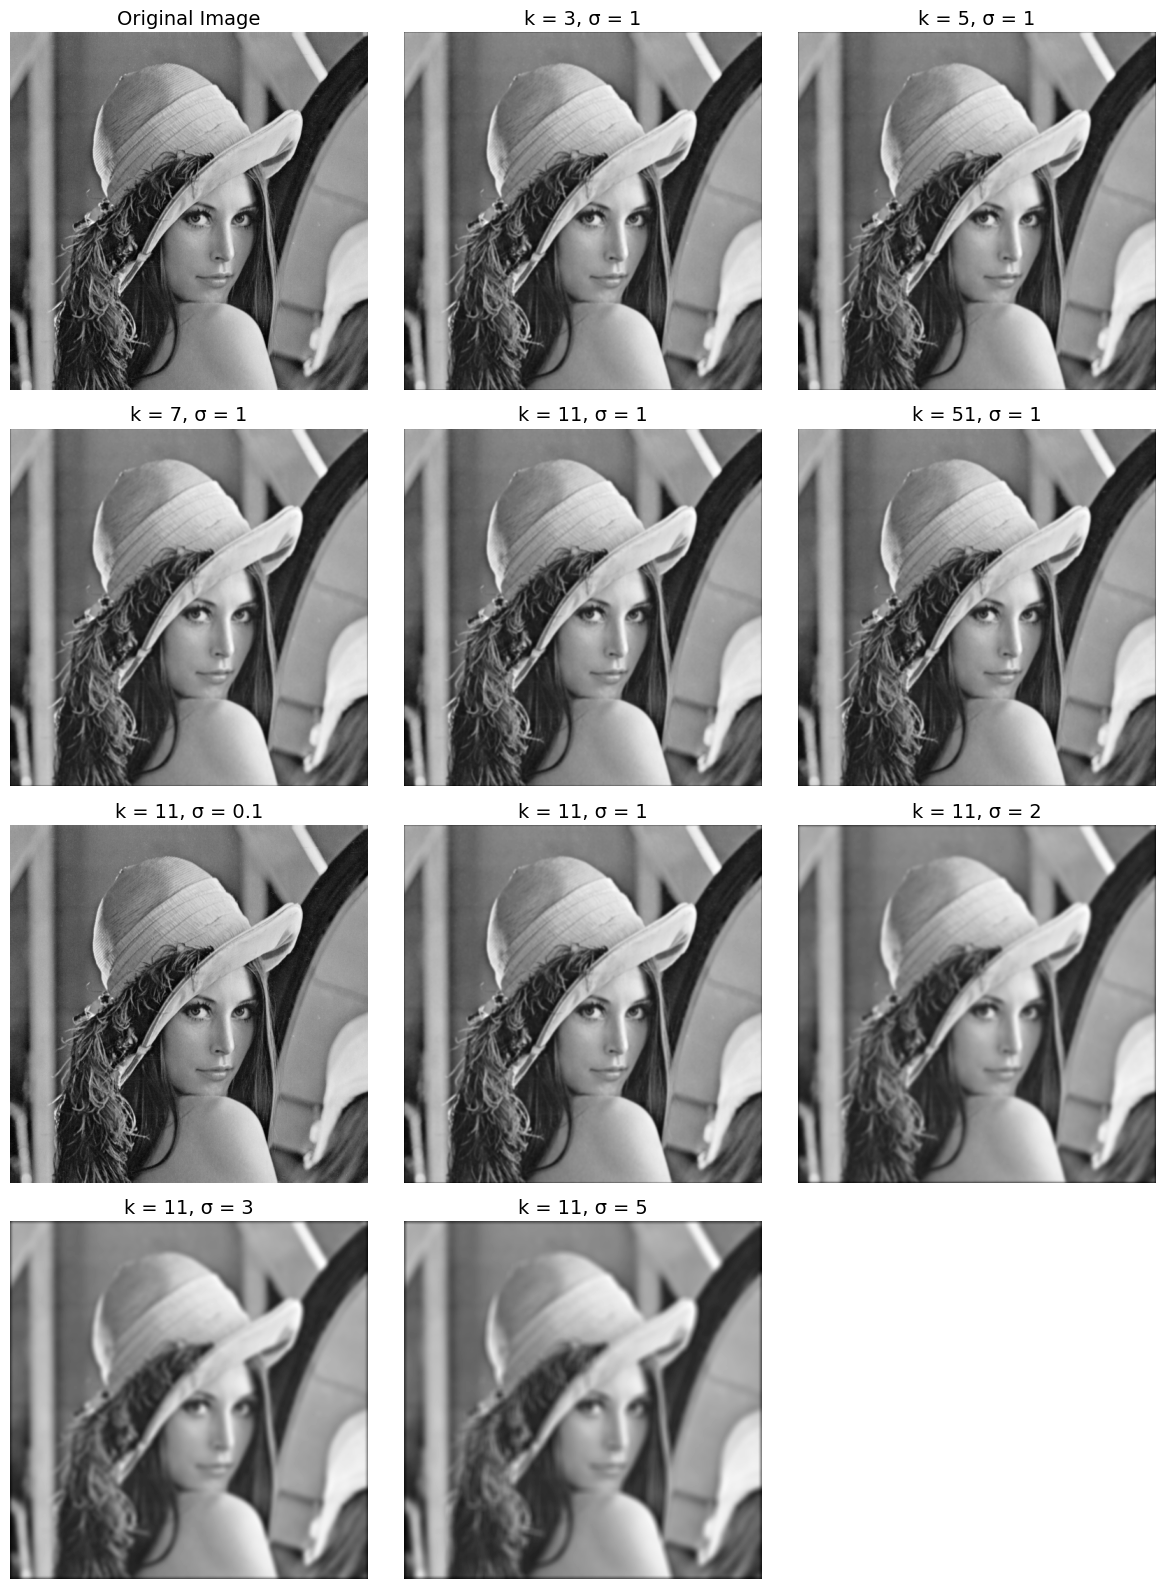

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and normalize it to [0, 1]
def load_image(path):
    image = Image.open(path).convert('L')
    return np.array(image) / 255.0

# Create a Gaussian kernel
def create_gaussian_kernel(k, sigma):
    ax = np.linspace(-(k // 2), k // 2, k)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

# Apply Gaussian smoothing using the kernel
def apply_gaussian_smoothing(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    pad_h, pad_w = k_height // 2, k_width // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    smoothed_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + k_height, j:j + k_width]
            smoothed_image[i, j] = np.sum(region * kernel)
    
    return smoothed_image

# Gaussian smoothing function
def myGaussianSmoothing(I, k, sigma):
    kernel = create_gaussian_kernel(k, sigma)
    return apply_gaussian_smoothing(I, kernel)

# Load the original image
image = load_image('lena.png')

# Test different kernel sizes with fixed sigma = 1
kernel_sizes = [3, 5, 7, 11, 51]
sigma_fixed = 1

plt.figure(figsize=(12, 16))
plt.subplot(4, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image', fontsize=14)
plt.axis('off')

for i, k in enumerate(kernel_sizes):
    smoothed_image = myGaussianSmoothing(image, k, sigma_fixed)
    plt.subplot(4, 3, i+2)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title(f'k = {k}, σ = {sigma_fixed}', fontsize=14)
    plt.axis('off')

# Test different sigma values with fixed kernel size = 11
sigma_values = [0.1, 1, 2, 3, 5]
kernel_fixed = 11

for i, sigma in enumerate(sigma_values):
    smoothed_image = myGaussianSmoothing(image, kernel_fixed, sigma)
    plt.subplot(4, 3, i + len(kernel_sizes) + 2)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title(f'k = {kernel_fixed}, σ = {sigma}', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [2]:
#Problem 3 
#Image filtering, 20pts) Let’s solve the problem that occurred from sampling. Everytime after 
#performing upsampling, perform Gaussian smoothing with k = 11 and σ = 1. Did it get better? 
#How about we perform median filtering? Implement your own median filter and apply it on the 
#same upsampled data. Did it improve the result? Which filtering is better? Discuss your 
#observation in the report.

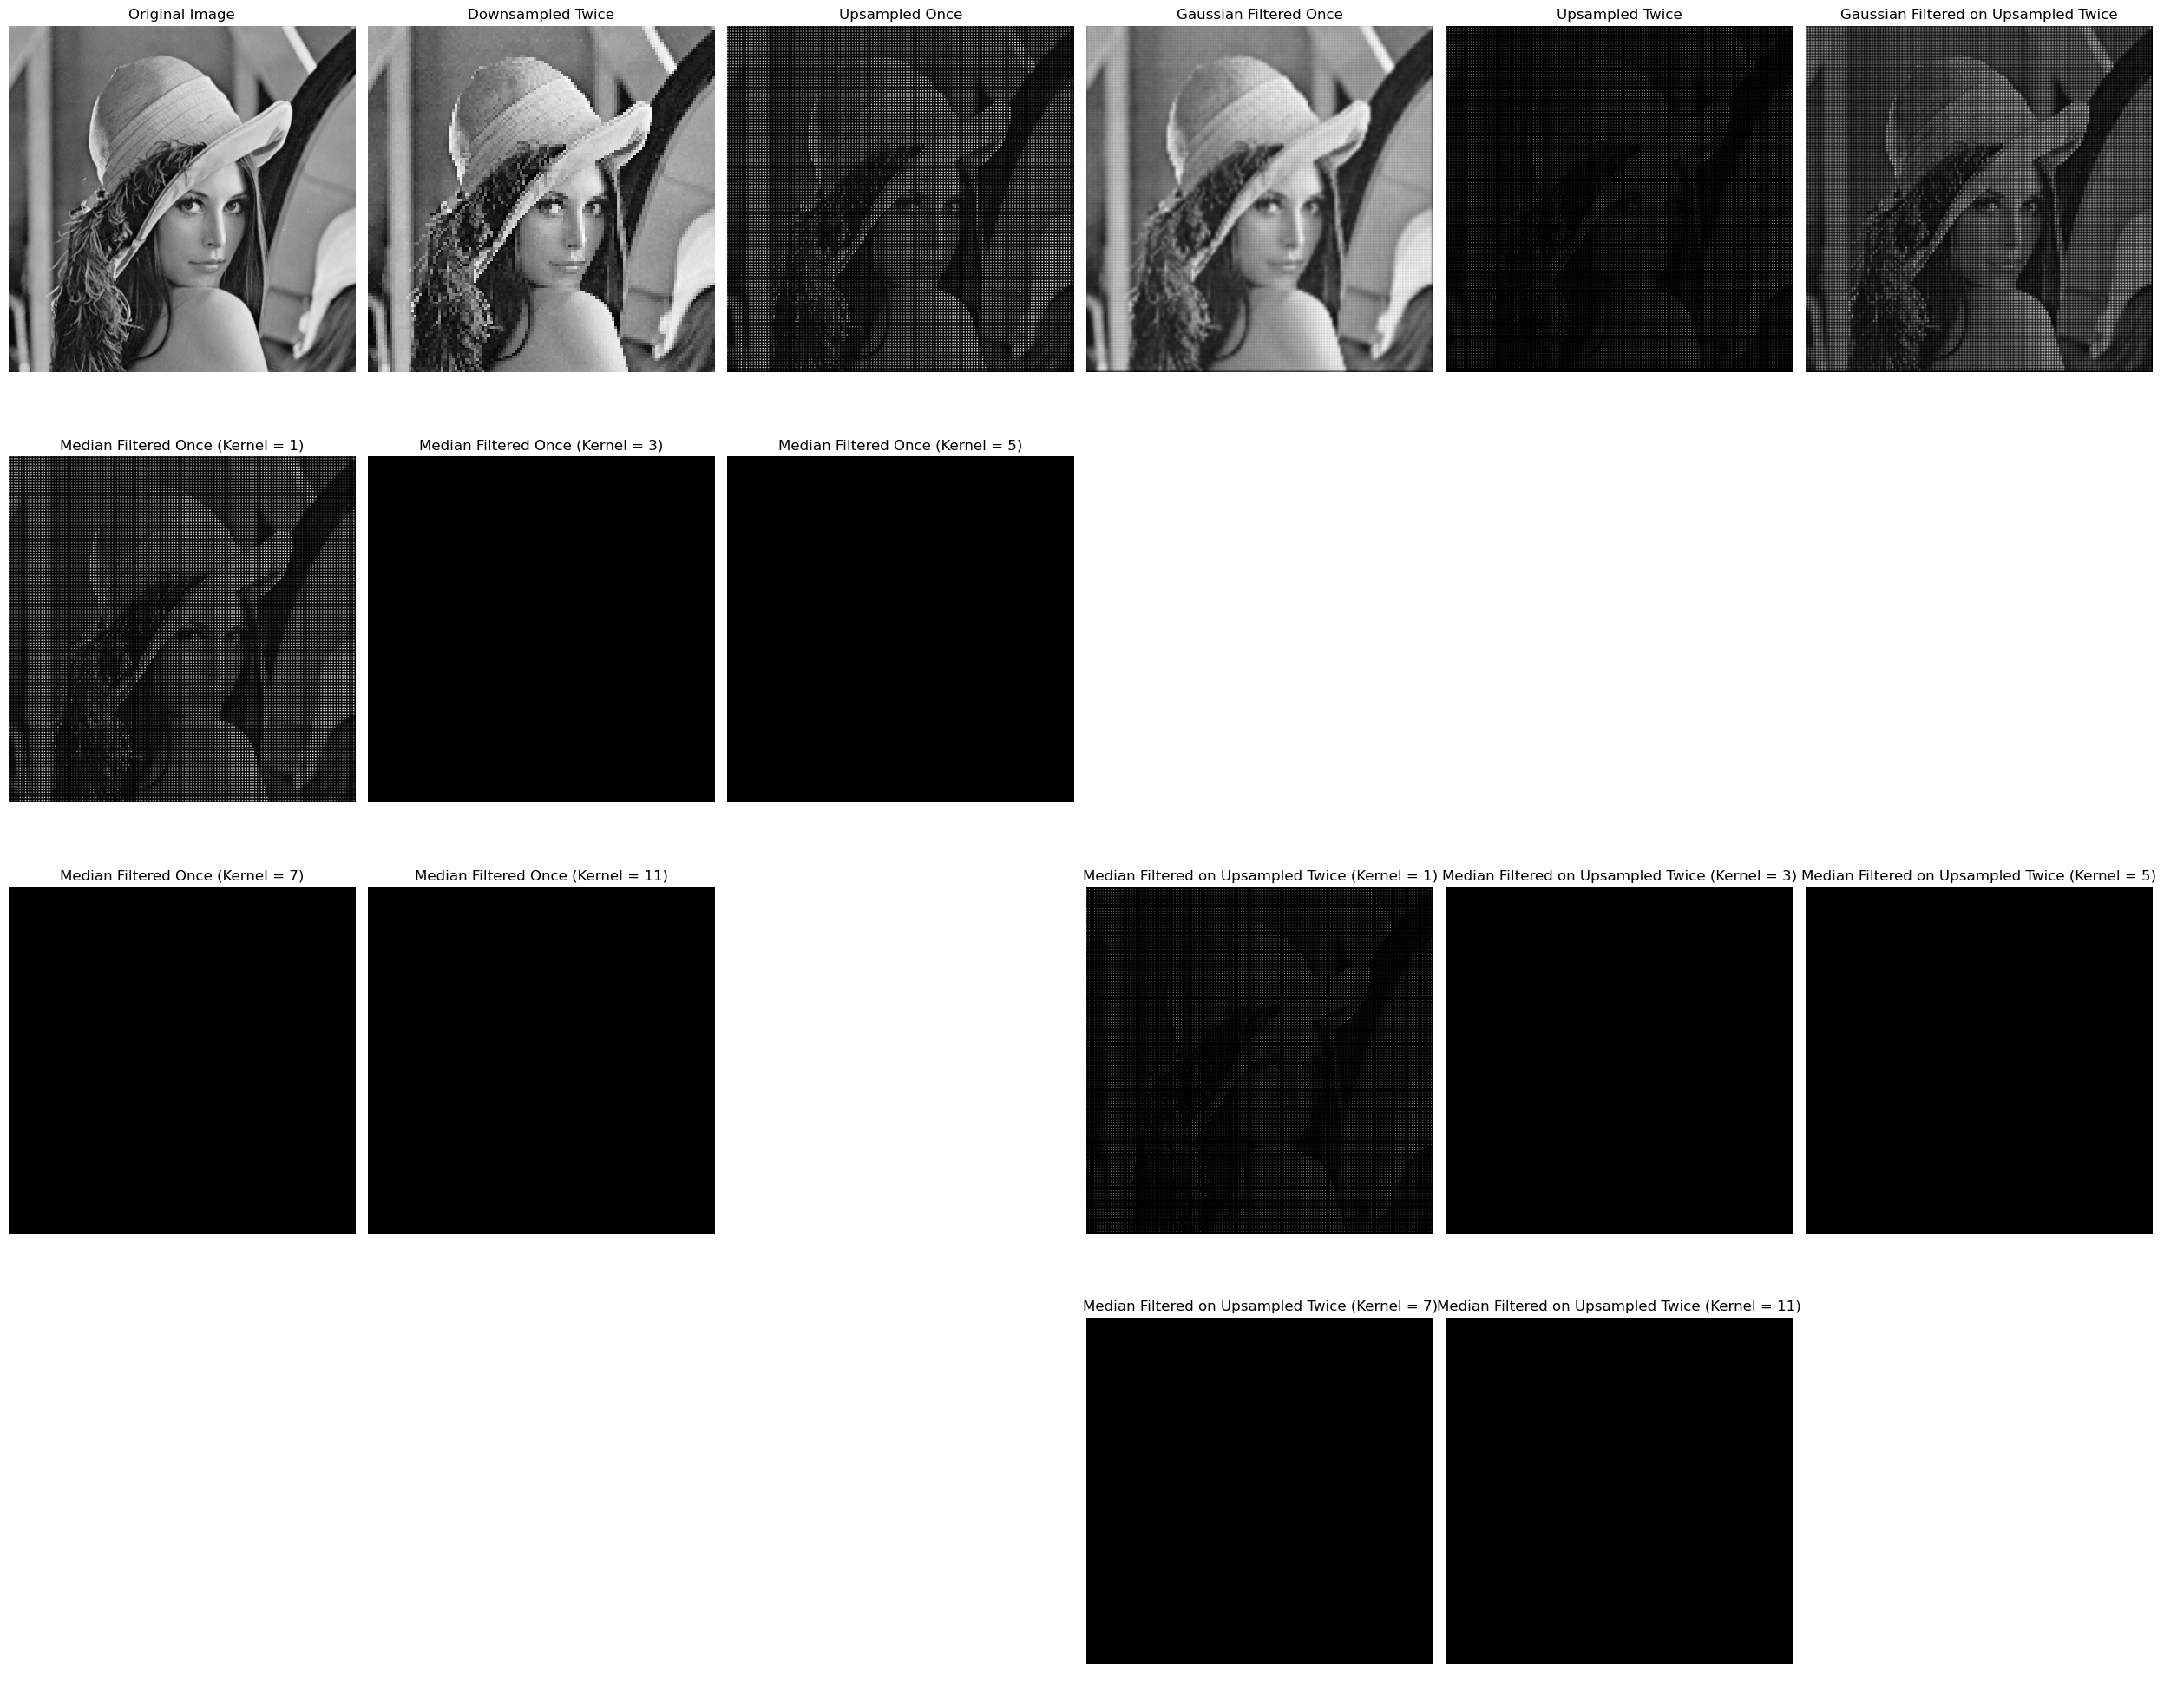

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to downsample the image by taking every other pixel
def downsample_image(image):
    return image[::2, ::2]  # Take every other pixel in both dimensions

# Function to upsample the image by inserting zeros between pixels
def upsample_image(image):
    height, width = image.shape
    upsampled_image = np.zeros((height * 2, width * 2))  # Create a zero-filled array twice the size
    upsampled_image[::2, ::2] = image  # Fill every other row and column with original image values
    return upsampled_image

# Function to apply Gaussian smoothing manually
def apply_gaussian_smoothing(image, kernel_size=3, sigma=1.0):
    # Create Gaussian kernel
    kernel_radius = kernel_size // 2
    kernel = np.zeros((kernel_size, kernel_size))
    
    # Compute Gaussian kernel values
    for x in range(-kernel_radius, kernel_radius + 1):
        for y in range(-kernel_radius, kernel_radius + 1):
            kernel[x + kernel_radius, y + kernel_radius] = (1/(2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    kernel /= np.sum(kernel)  # Normalize the kernel
    
    # Convolve the image with the Gaussian kernel
    height, width = image.shape
    padded_image = np.pad(image, ((kernel_radius, kernel_radius), (kernel_radius, kernel_radius)), mode='constant')
    smoothed_image = np.zeros_like(image)
    
    # Apply the kernel to each pixel in the image
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            smoothed_image[i, j] = np.sum(region * kernel)
    
    return smoothed_image

# Function to apply median filtering manually for a given kernel size
def apply_median_filter(image, kernel_size=3):
    kernel_radius = kernel_size // 2
    height, width = image.shape
    padded_image = np.pad(image, ((kernel_radius, kernel_radius), (kernel_radius, kernel_radius)), mode='constant')
    median_filtered_image = np.zeros_like(image)
    
    # Apply median filtering manually using a sliding window approach
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            median_filtered_image[i, j] = np.median(region)
    
    return median_filtered_image

# Load the image and convert it to grayscale and normalize
def load_image(path):
    image = Image.open(path).convert('L')  # Convert to grayscale
    return np.array(image) / 255.0  # Normalize to [0, 1]

# Load the original image
I = load_image('lena.png')

# Step 1: Downsample the image twice
downsampled_once = downsample_image(I)
downsampled_twice = downsample_image(downsampled_once)

# Step 2: Upsample the downsampled image once
upsampled_once = upsample_image(downsampled_twice)

# Step 3: Apply Gaussian smoothing to the upsampled image from step 2
gaussian_filtered_once = apply_gaussian_smoothing(upsampled_once, kernel_size=5, sigma=1.0)

# Step 4: Upsample the original upsampled image from step 2 again (not the filtered images)
upsampled_twice = upsample_image(upsampled_once)

# Step 5: Apply Gaussian smoothing to the upsampled image from step 4
gaussian_filtered_twice = apply_gaussian_smoothing(upsampled_twice, kernel_size=5, sigma=1.0)

# Median Filtering for kernel sizes 1, 3, 5, 7, and 11 on the upsampled once image and twice upsampled image
kernel_sizes = [1, 3, 5, 7, 11]
median_filtered_once_results = {}
median_filtered_twice_results = {}

for k in kernel_sizes:
    median_filtered_once_results[k] = apply_median_filter(upsampled_once, kernel_size=k)
    median_filtered_twice_results[k] = apply_median_filter(upsampled_twice, kernel_size=k)

# Display all results step-by-step using matplotlib for plotting
fig, axes = plt.subplots(4, 6, figsize=(25, 20))  # Adjusted to 4 rows and 6 columns

# Original Image
axes[0, 0].imshow(I, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Downsampled Twice
axes[0, 1].imshow(downsampled_twice, cmap='gray')
axes[0, 1].set_title('Downsampled Twice')
axes[0, 1].axis('off')

# Upsampled Once (from downsampled twice)
axes[0, 2].imshow(upsampled_once, cmap='gray')
axes[0, 2].set_title('Upsampled Once')
axes[0, 2].axis('off')

# Gaussian Filtered Once
axes[0, 3].imshow(gaussian_filtered_once, cmap='gray')
axes[0, 3].set_title('Gaussian Filtered Once')
axes[0, 3].axis('off')

# Upsampled Twice (from original upsampled once)
axes[0, 4].imshow(upsampled_twice, cmap='gray')
axes[0, 4].set_title('Upsampled Twice')
axes[0, 4].axis('off')

# Gaussian Filtered Twice
axes[0, 5].imshow(gaussian_filtered_twice, cmap='gray')
axes[0, 5].set_title('Gaussian Filtered on Upsampled Twice')
axes[0, 5].axis('off')

# Display Median Filtering Results for Kernel Sizes 1, 3, 5, 7, and 11 (Upsampled Once)
for idx, k in enumerate(kernel_sizes):
    row = 1 + (idx // 3)  # Start from row 1
    col = (idx % 3)
    axes[row, col].imshow(median_filtered_once_results[k], cmap='gray')
    axes[row, col].set_title(f'Median Filtered Once (Kernel = {k})')
    axes[row, col].axis('off')

# Display Median Filtering Results for Kernel Sizes 1, 3, 5, 7, and 11 (Twice Upsampled)
for idx, k in enumerate(kernel_sizes):
    row = 2 + (idx // 3)  # Start from row 2
    col = (idx % 3) + 3   # Start from column 3
    axes[row, col].imshow(median_filtered_twice_results[k], cmap='gray')
    axes[row, col].set_title(f'Median Filtered on Upsampled Twice (Kernel = {k})')
    axes[row, col].axis('off')

# Hide any unused subplot spaces
for row in range(4):
    for col in range(6):
        if not axes[row, col].has_data():  # If there's no data in the subplot
            axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [28]:
#Question 4
#(Noise, 20pts) On the original ‘lena.png’ image, let’s add some Gaussian noise ∼ N(0; 0:1) at each 
#pixel, i.e., I noisy(x; y) = I(x; y) + r where r ∼ N(0; 0:1). How is the image looking? Now, let’s 
#perform Gaussian smoothing with any parameter you like that works. Did the result improve? 
#Median filter in the previous question probably made you frustrating, but let’s give it one more 
#chance. Apply median filtering and see how the result shows. Now, let’s go change the type of 
#noise you added. Before you add it to the original image, set the noise to value 1 everywhere where 
#the noise was > 0:2 and 0 otherwise. Apply Gaussian smoothing and see what you get. Apply 
#median filtering as well and see what you get. Discuss your observation in the report

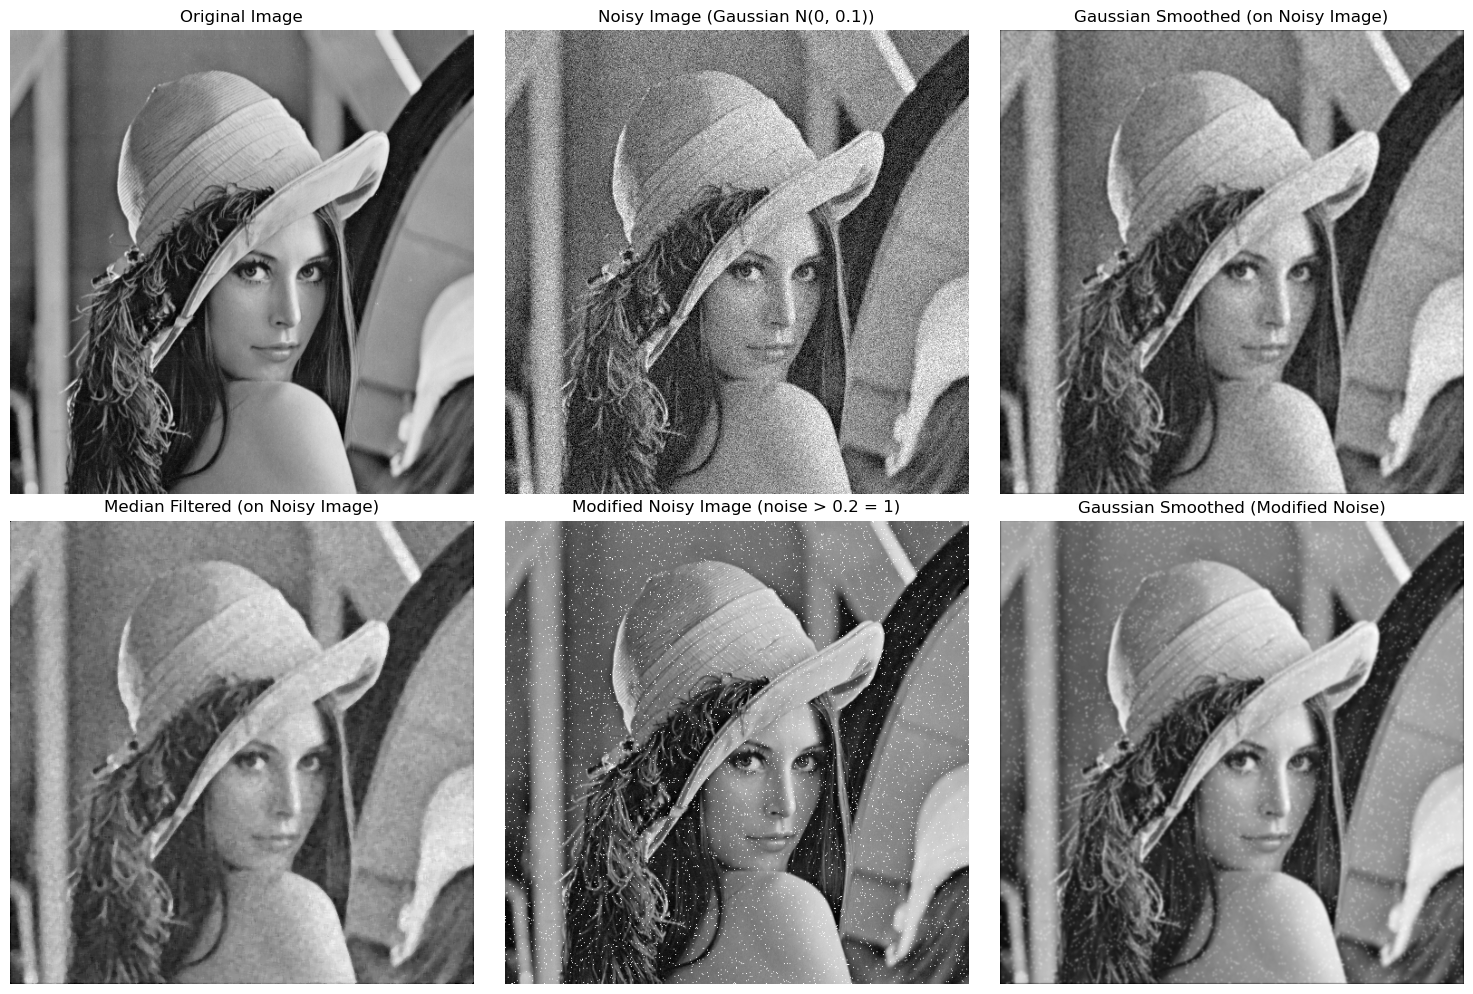

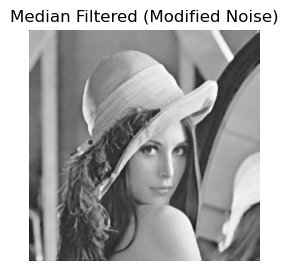

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and normalize it to [0, 1]
def load_image(path):
    image = Image.open(path).convert('L')
    return np.array(image) / 255.0

# Add Gaussian noise to the image
def add_gaussian_noise(image, mean=0, std=0.1):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 1)  # Clip values to keep in [0, 1]
    return noisy_image

# Modify the noise: Set the noise to 1 where noise > 0.2 and 0 otherwise (before adding it to the image)
def modify_noise(image, std=0.1, threshold=0.2):
    noise = np.random.normal(0, std, image.shape)
    modified_noise = np.where(noise > threshold, 1, 0)  # Modify noise before adding to image
    noisy_image = image + modified_noise  # Now add the modified noise to the original image
    noisy_image = np.clip(noisy_image, 0, 1)  # Clip values to keep in [0, 1]
    return noisy_image

# Create a Gaussian kernel
def create_gaussian_kernel(k, sigma):
    ax = np.linspace(-(k // 2), k // 2, k)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

# Apply Gaussian smoothing using the kernel
def apply_gaussian_smoothing(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    pad_h, pad_w = k_height // 2, k_width // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    smoothed_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + k_height, j:j + k_width]
            smoothed_image[i, j] = np.sum(region * kernel)
    
    return smoothed_image

# Gaussian smoothing function
def myGaussianSmoothing(I, k, sigma):
    kernel = create_gaussian_kernel(k, sigma)
    return apply_gaussian_smoothing(I, kernel)

# Custom implementation of median filtering
def myCustomMedianFilter(image, k):
    pad_size = k // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i + k, j:j + k]
            filtered_image[i, j] = np.median(window)
    
    return filtered_image

# Load the original image
image = load_image('lena.png')

# Step 1: Add Gaussian noise N(0, 0.1)
noisy_image = add_gaussian_noise(image)

# Step 2: Perform Gaussian smoothing (using any suitable parameters)
k_gaussian = 11
sigma = 1
gaussian_smoothed_image = myGaussianSmoothing(noisy_image, k_gaussian, sigma)

# Step 3: Apply Median filtering (with kernel size 5)
k_median = 5
median_filtered_image = myCustomMedianFilter(noisy_image, k_median)

# Step 4: Modify the noise (set noise to 1 where noise > 0.2 and 0 otherwise)
modified_noisy_image = modify_noise(image)

# Step 5: Apply Gaussian smoothing to the modified noisy image
gaussian_smoothed_modified_noise_image = myGaussianSmoothing(modified_noisy_image, k_gaussian, sigma)

# Step 6: Apply Median filtering to the modified noisy image
median_filtered_modified_noise_image = myCustomMedianFilter(modified_noisy_image, k_median)

# Display all results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image', fontsize=12)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian N(0, 0.1))', fontsize=12)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_smoothed_image, cmap='gray')
plt.title('Gaussian Smoothed (on Noisy Image)', fontsize=12)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered (on Noisy Image)', fontsize=12)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(modified_noisy_image, cmap='gray')
plt.title('Modified Noisy Image (noise > 0.2 = 1)', fontsize=12)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(gaussian_smoothed_modified_noise_image, cmap='gray')
plt.title('Gaussian Smoothed (Modified Noise)', fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

# Display the final median filtered modified noisy image
plt.figure(figsize=(3, 3))
plt.imshow(median_filtered_modified_noise_image, cmap='gray')
plt.title('Median Filtered (Modified Noise)', fontsize=12)
plt.axis('off')

plt.show()


In [30]:
#Question 5 
#(Sobel filters, 20pts) Implement a Sobel filter that calculates gradient along x and y directions. To 
#visualize our sobel operator, normalize the gradients so that all the values lie between [0,1]. Your 
#function should look like [mag, ori] = mySobelFilter(I) that takes an image I as an input and output 
#edge response (magnitude) and orientation for each pixel. Try visualizing the result in color by 
#using the magnitude to specify the saturation and value of an image and the orientation to specify 
#the hue. We haven’t talked HSV space in the class but can be found at 
#https://en.wikipedia.org/wiki/HSL_and_HSV. Discuss your observation in the report

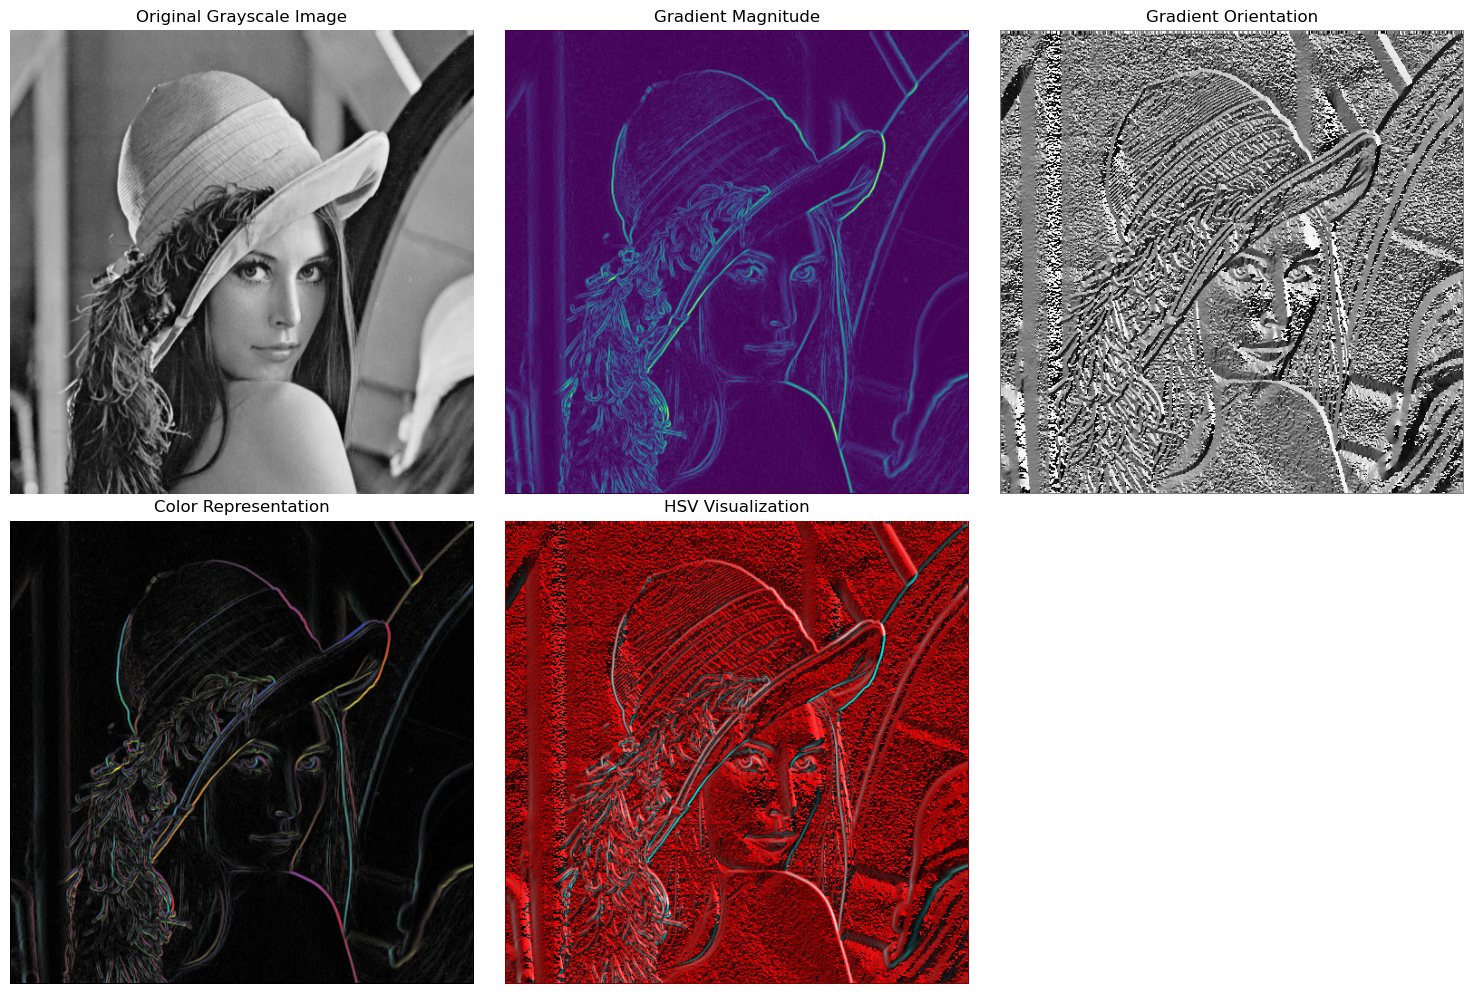

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Sobel filters for gradient calculation
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Function to apply Sobel filter 
def mySobelFilter(I):
    height, width = I.shape
    G_x = np.zeros_like(I)  # Gradient in x direction
    G_y = np.zeros_like(I)  # Gradient in y direction
    
    # Apply Sobel filter by convolving the image
    for i in range(1, height-1):
        for j in range(1, width-1):
            # Extract the 3x3 region around each pixel
            region = I[i-1:i+2, j-1:j+2]
            
            # Apply Sobel filters
            G_x[i, j] = np.sum(sobel_x * region)
            G_y[i, j] = np.sum(sobel_y * region)
    
    # Compute the gradient magnitude and orientation
    magnitude = np.sqrt(G_x**2 + G_y**2)
    orientation = np.arctan2(G_y, G_x)
    
    # Normalize the magnitude and orientation to [0, 1]
    magnitude = (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude))
    orientation_normalized = (orientation + np.pi) / (2 * np.pi)  # Normalize [-π, π] to [0, 1]
    
    return magnitude, orientation_normalized

#  HSV to RGB conversion function 
def hsv_to_rgb_manual(h, s, v):
    h = h * 360  # Convert hue to degrees
    c = v * s  # Chroma
    x = c * (1 - abs((h / 60) % 2 - 1))
    m = v - c

    if 0 <= h < 60:
        r, g, b = c, x, 0
    elif 60 <= h < 120:
        r, g, b = x, c, 0
    elif 120 <= h < 180:
        r, g, b = 0, c, x
    elif 180 <= h < 240:
        r, g, b = 0, x, c
    elif 240 <= h < 300:
        r, g, b = x, 0, c
    else:
        r, g, b = c, 0, x

    r = (r + m)
    g = (g + m)
    b = (b + m)
    
    return r, g, b

# Convert magnitude and orientation to HSV image and convert to RGB
def convert_to_hsv_manual(magnitude, orientation):
    height, width = magnitude.shape
    hsv_image_rgb = np.zeros((height, width, 3))
    hsv_image_direct = np.zeros((height, width, 3))  # Direct HSV visualization (Hue, Saturation, Value)

    for i in range(height):
        for j in range(width):
            h = orientation[i, j]  # Hue from orientation
            s = magnitude[i, j]    # Saturation from magnitude
            v = magnitude[i, j]    # Value from magnitude
            
            # Direct HSV image values
            hsv_image_direct[i, j, 0] = h    # Hue channel
            hsv_image_direct[i, j, 1] = s    # Saturation channel
            hsv_image_direct[i, j, 2] = v    # Value channel
            
            # Convert HSV to RGB manually
            r, g, b = hsv_to_rgb_manual(h, s, v)
            
            hsv_image_rgb[i, j, 0] = r
            hsv_image_rgb[i, j, 1] = g
            hsv_image_rgb[i, j, 2] = b
    
    return hsv_image_rgb, hsv_image_direct

# Function to display the results
def display_results(original, magnitude, orientation, hsv_image_rgb, hsv_image_direct):
    plt.figure(figsize=(15, 10))
    
    # Display original grayscale image
    plt.subplot(2, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')
    
    # Display magnitude
    plt.subplot(2, 3, 2)
    plt.imshow(magnitude)
    plt.title('Gradient Magnitude')
    plt.axis('off')
    
    # Display orientation
    plt.subplot(2, 3, 3)
    plt.imshow(orientation, cmap='gray')
    plt.title('Gradient Orientation')
    plt.axis('off')
    
    # Display RGB converted from HSV image
    plt.subplot(2, 3, 4)
    plt.imshow(hsv_image_rgb)  
    plt.title('Color Representation')
    plt.axis('off')
    
    # Display direct HSV image without conversion
    plt.subplot(2, 3, 5)
    plt.imshow(hsv_image_direct, cmap='hsv')  # Directly displaying the HSV image
    plt.title('HSV Visualization')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the original image and convert it to grayscale
def load_image(path):
    image = Image.open(path).convert('L')  # Convert to grayscale
    image = np.array(image) / 255.0  # Normalize to [0, 1]
    return image

# Load the image (input image)
I = load_image('lena.png')

# Step 1: Apply the Sobel filter to get magnitude and orientation
magnitude, orientation = mySobelFilter(I)

# Step 2: Convert the magnitude and orientation to an HSV image (then convert to RGB)
hsv_image_rgb, hsv_image_direct = convert_to_hsv_manual(magnitude, orientation)

# Step 3: Display the results, including original, magnitude, orientation, and color representations
display_results(I, magnitude, orientation, hsv_image_rgb, hsv_image_direct)
